In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd, orth, qr
from scipy.optimize import curve_fit
from numpy import sin, cos, pi
cmap = plt.cm.viridis

In [2]:
from initial_conditions import Domain, Heaviside, LinearRamp, SmoothRamp, Sigmoid, CkRamp
from basis_functions import SVD, Trigonometric, Trigonometric2, TrigonometricOdd, Greedy, LNA, LPF, Sinc

In [30]:
import matplotlib.pyplot as plt
import matplotlib as mpl
page_width_pt = 455.24
pt2in = 0.01389 
pt2cm = 0.0352777778
cm2in = 1/2.54
plot_width_in = page_width_pt*pt2in/2
print(plot_width_in/cm2in)

fs = 10
fs_lbl = 6
plt.rcParams["figure.figsize"] = (plot_width_in, plot_width_in/1.61803398875)
plt.rcParams["figure.autolayout"] = True
plt.rcParams['font.size'] = fs
plt.rcParams['axes.titlesize'] = fs
plt.rcParams['axes.labelsize'] = fs
plt.rcParams['xtick.labelsize'] = fs
plt.rcParams['ytick.labelsize'] = fs
plt.rcParams['legend.labelspacing'] = 0.0
plt.rcParams['legend.fontsize'] = fs_lbl
plt.rcParams['legend.handlelength'] = 1.0

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
mpl.rc('text', usetex=True)
mpl.rc('font', family='serif', size=12, serif='Computer Modern Roman')
pth = "../Plots/"

8.030570172000001


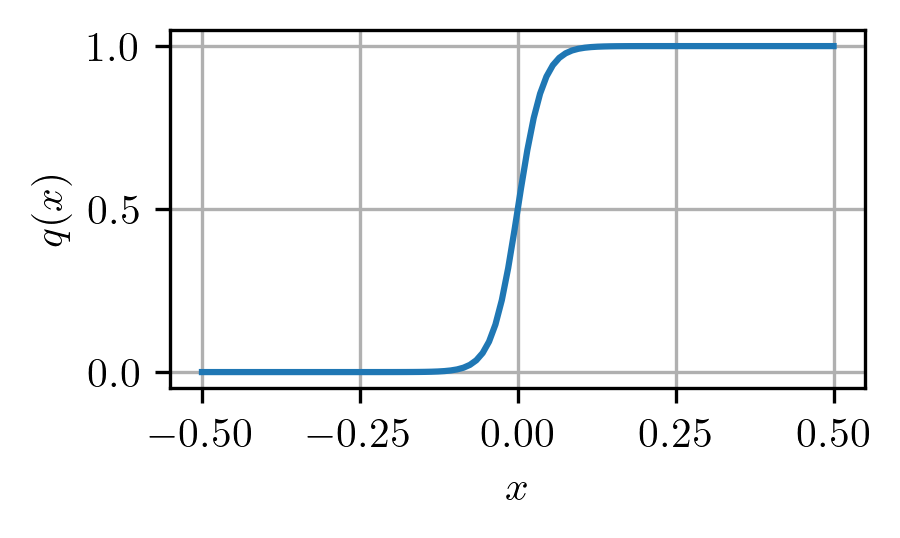

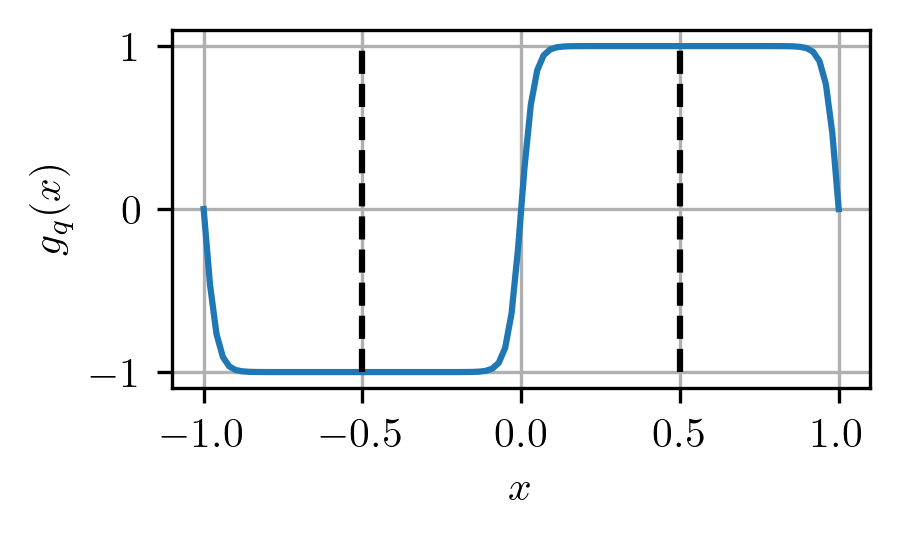

In [4]:
import numpy as np
import matplotlib.pyplot as plt


# def f(x):
#     y = np.zeros_like(x)
#     y[x < 0] = 0.
#     y[x > 0] = 1.
#     y[x == 0] = 0.5
#     return y


def f(x, a=50):
    return 1.0 / (1+np.e**(-(x)*a))


def g0(x):
    y = np.zeros_like(x)
    i1 = (-1 < x) & (x <= -0.5)
    i2 = (-0.5 < x) & (x <= 0.0)
    i3 = (0.0 < x) & (x <= 0.5)
    i4 = (0.5 < x) & (x <= 1.0)
    y[i1] = -f(x[i1]+0.75)
    y[i2] = -f(-x[i2]-0.25)
    y[i3] = f(x[i3]-0.25)
    y[i4] = f(-x[i4]+0.75)
    return y


def g(x, eps):
    y = np.zeros_like(x)
    i1 = (-1.0 < x) & (x <= -0.5)
    i2 = (-.5 < x) & (x <= 0.5)
    i3 = (0.5 < x) & (x <= 1.0)
    y[i1] = -f(x[i1]+1.0, eps)*2+1
    y[i2] = f(x[i2], eps)*2-1
    y[i3] = -f(x[i3]-1.0, eps)*2+1
    return y

fig = plt.figure(tight_layout=True)
x = np.linspace(-0.5, 0.5, 100)
plt.plot(x, f(x, 50))
plt.xlabel("$x$")
plt.ylabel("$q(x)$")
plt.grid()
plt.savefig(pth+"q(x).pdf")
plt.show()

fig = plt.figure(tight_layout=True)
x = np.linspace(-1, 1, 100)
plt.plot(x, g(x, 50))
#plt.plot([-1, -1], [-1, 1], "k--")
plt.plot([-0.5, -0.5], [-1, 1], "k--")
#plt.plot([-0., -0.], [-1, 1], "k--")
plt.plot([0.5, 0.5], [-1, 1], "k--")
#plt.plot([1, 1], [-1, 1], "k--")
plt.xlabel("$x$")
plt.ylabel("$g_q(x)$")
plt.grid()
plt.savefig(pth+"g(x).pdf")
plt.show()

In [5]:
def uh(x, eps):
    y = np.zeros_like(x)
    y[x < 0] = 0.
    y[x > 0] = 1.
    y[x == 0] = 0.5
    return y


def move_x_intercept(u):
    def _impl(x, eps):
        x_ = x+eps/2
        y = u(x_, eps)
        y[x_ > eps] = 1.0
        y[x_ < 0] = 0.0
        return y
    return _impl

@move_x_intercept
def u0(x, eps):
    y = 1/eps * x
    return y

@move_x_intercept
def u1(x, eps):
    e = eps
    y = -2/e**3 * x**3 + 3/e**2*x**2
    return y

@move_x_intercept
def u2(x, eps):
    e = eps
    y = 6/e**5*x**5 - 15/e**4*x**4 + 10/e**3*x**3
    return y

@move_x_intercept
def u3(x, eps):
    e = eps
    y = -20/e**7 * x**7 + 70/e**6 * x**6 - 84/e**5 * x**5 + 35/e**4 * x**4
    return y

@move_x_intercept
def u4(x, eps):
    e = eps
    y = (70/e**9*x**9 - 315/e**8*x**8 + 540/e**7*x**7
         - 420/e**6*x**6 + 126/e**5*x**5)
    return y

@move_x_intercept
def u5(x, eps):
    e = eps
    y = (-252/e**11*x**11 + 1386/e**10*x**10 - 3080/e**9*x**9
         + 3465/e**8*x**8 - 1980/e**7*x**7 + 462/e**6*x**6)
    return y

def us(x, eps, k=4):
    sin, pi = np.sin, np.pi
    m = pi**k/2**k
    y = sin(pi/2 * x/m*2/eps)
    for i in range(k-1):
        y = sin(pi/2 * y)
    y = y/2+0.5
    y[x < -m*eps/2] = 0
    y[x > m*eps/2] = 1
    return y

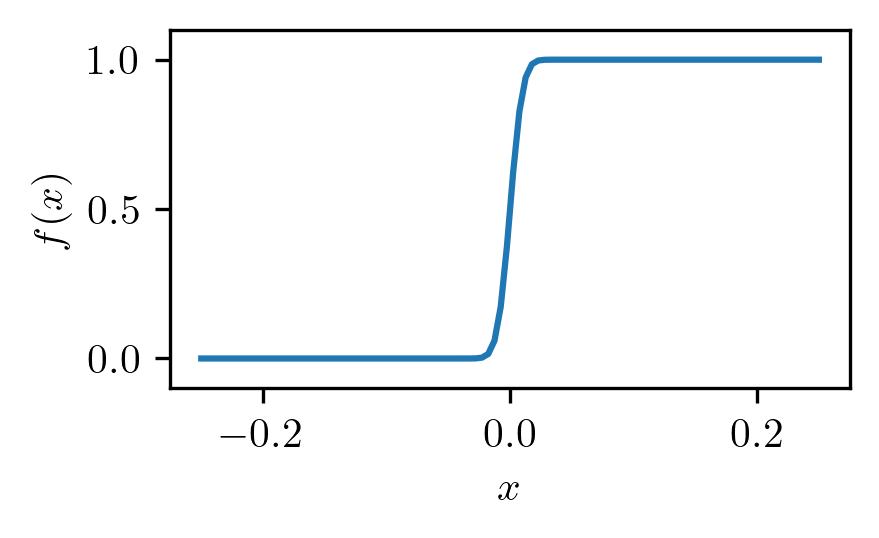

In [6]:
fig = plt.figure()
x = np.linspace(-0.25, 0.25, 100)

plt.plot(x, us(x, eps=1/50))
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.ylim([-.1, 1.1])
plt.show()

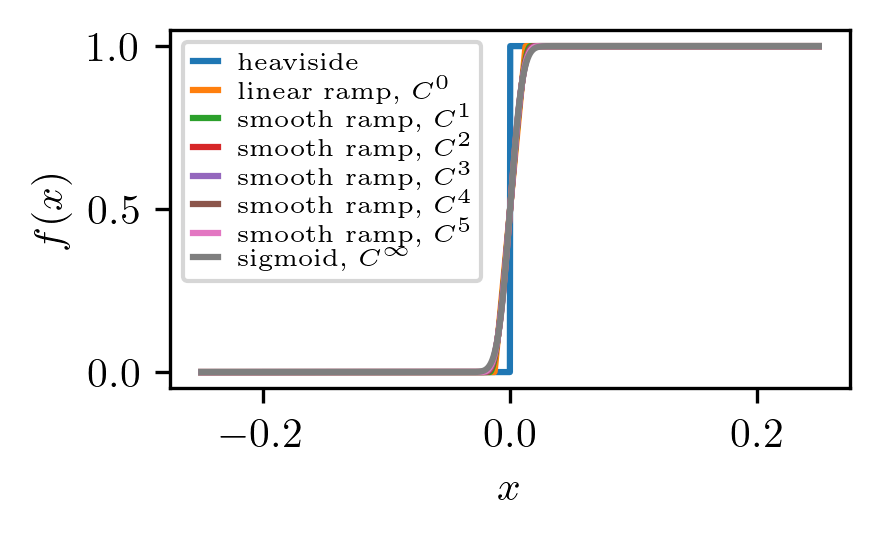

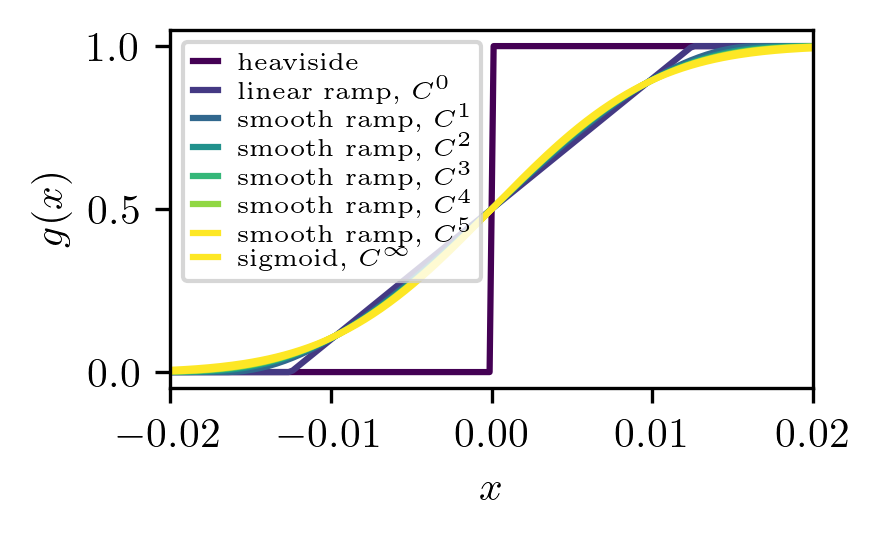

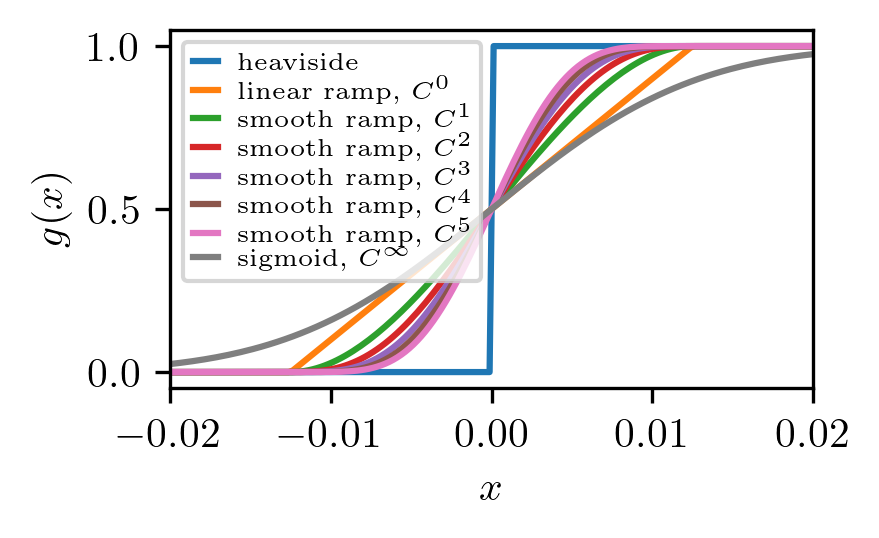

In [33]:
fig = plt.figure()
x = np.linspace(-0.25, 0.25, 2000)
fs = [u0, u1, u2, u3, u4, u5, us]  # uh, 
epss = [0.05, 0.06632, 0.08004, 0.09184, 0.10232, 0.11184, 0.019789523*2]  #0.0, 
names = ["linear ramp, $C^0$", "smooth ramp, $C^1$", "smooth ramp, $C^2$",
         "smooth ramp, $C^3$", "smooth ramp, $C^4$", "smooth ramp, $C^5$", "sigmoid, $C^\infty$"]  # "heaviside", 
for f, eps, name in zip(fs, epss, names):
    plt.plot(x, f(x, eps/2), label=name)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.show()

fig = plt.figure()
x = np.linspace(-0.25, 0.25, 2000)
i = 0
for f, eps, name in zip(fs, epss, names):
    color=cmap(i/6)
    i += 1
    plt.plot(x, f(x, eps/2), label=name, color=color)
plt.xlabel("$x$")
plt.ylabel("$g(x)$")
plt.xlim([-.02, .02])
plt.legend()
plt.show()

for f, eps, name in zip(fs, epss, names):
    eps = 0.05
    plt.plot(x, f(x, eps/2), label=name)
plt.xlabel("$x$")
plt.ylabel("$g(x)$")
plt.xlim([-.02, .02])
plt.legend()
plt.show()

In [8]:
def normalize(U):
    # U_n = U / (np.sum(U**2, axis=1)**.5)[:, None]
    U_n = U / (np.sum(U**2, axis=0)**.5)
    return U_n

In [9]:
def trig(x, r=None):
    # based on analytic sine functions
    m = x.size
    N = x.size
    if not r:
        r = m
    U = np.ones((m, 2*r))
    delta_x = x[1] - x[0]
    A = (2*delta_x)**.5
    T = x[-1]-x[0]+delta_x

    # Nyquist–Shannon sampling theorem
    omega_max = 1/2 * 2*np.pi * N/T
    for i in range(r):
        omega = (2*i+1)/2 * 2*np.pi
        if omega <= omega_max:
            U[:, 2*i] = A * np.sin(omega*x)
            U[:, 2*i+1] = A * np.cos(omega*x)
        else:
            print(i, omega, omega_max)
            U = U[:, :(2*i)]
            break
    return normalize(U)

In [10]:
m, n = 2500, 2500
x = np.linspace(0, 1, m, endpoint=False)
mu = np.linspace(0, 1, n, endpoint=False)

In [11]:
U = trig(x)

1250 7857.123226628072 7853.981633974483


In [12]:
def ssm(x, mu):
    m = x.size
    n = mu.size
    X = np.ones((m, n))
    for i in range(n):
        X[:, i] = g(x-mu[i], 0.025)
    return X

In [13]:
f = u1
X = ssm(x, mu)


(2500, 2500)

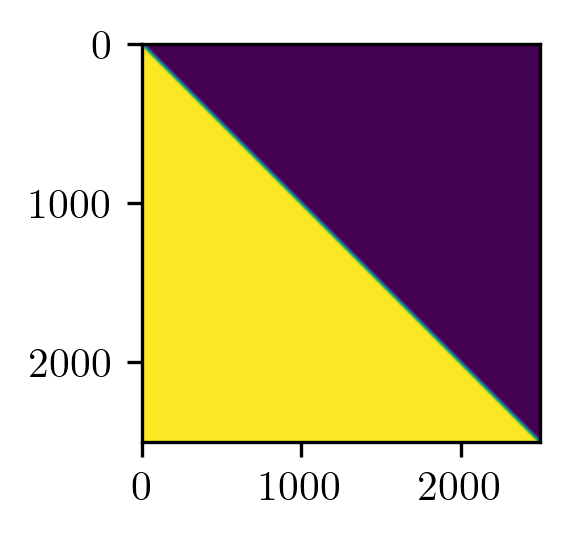

In [14]:
plt.imshow(X)
X.shape

In [15]:
u = X
k, j = 1, 3
Vk, Vj = U[:, k, None], U[:, j, None]
P_Vk, P_Vj = Vk@Vk.T, Vj@Vj.T
print(P_Vk.shape, u.shape)
lhs, rhs = P_Vk@u, P_Vj@u

(2500, 2500) (2500, 2500)


1.0000000000000004
8.326672684688674e-17


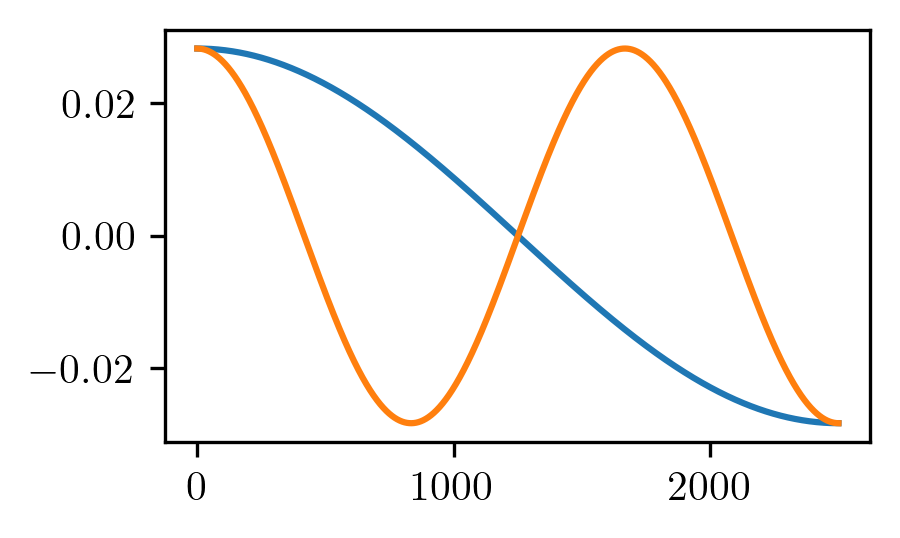

In [16]:
plt.plot(Vk.ravel())
plt.plot(Vj.ravel())


def dot(a, b):
    return (a*b).sum()

def dist(a, b):
    return ((a-b)**2).sum()


print(dot(Vk, Vk))
print(dot(Vk, Vj))

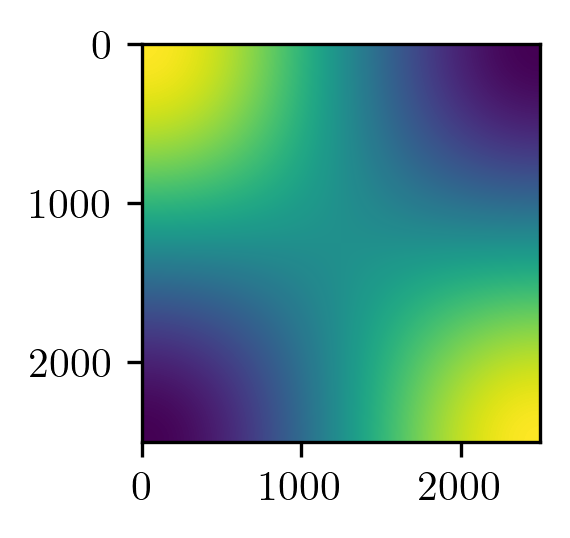

In [17]:
plt.imshow(P_Vk)

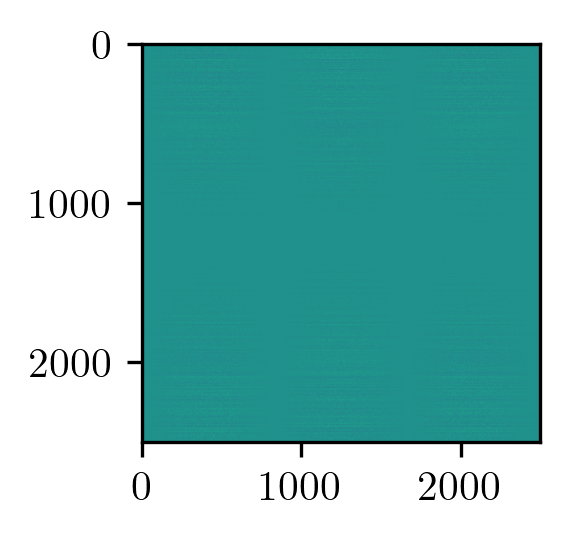

In [18]:
plt.imshow(lhs@rhs)

In [19]:
svd_basis = SVD(X)
trig_basis_odd = TrigonometricOdd(x)

In [20]:
is_flipped = np.median(svd_basis.U/trig_basis_odd.U, axis=0)<0
svd_basis.U[:, is_flipped] *= -1
svd_basis.VT[is_flipped, :] *= -1

C:\Users\florianma\AppData\Local\Temp\ipykernel_35504\2692103984.py:1: RuntimeWarning: divide by zero encountered in true_divide
  is_flipped = np.median(svd_basis.U/trig_basis_odd.U, axis=0)<0


C:\Users\florianma\AppData\Local\Temp\ipykernel_35504\1769624275.py:7: RuntimeWarning: divide by zero encountered in true_divide
  is_flipped = np.median(svd_basis.U/trig_basis_odd.U, axis=0)<0
C:\Users\florianma\AppData\Local\Temp\ipykernel_35504\1769624275.py:8: RuntimeWarning: divide by zero encountered in true_divide
  np.median(svd_basis.U/trig_basis_odd.U, axis=0)[s:s+2]


array([0.00632445, 0.00632445])

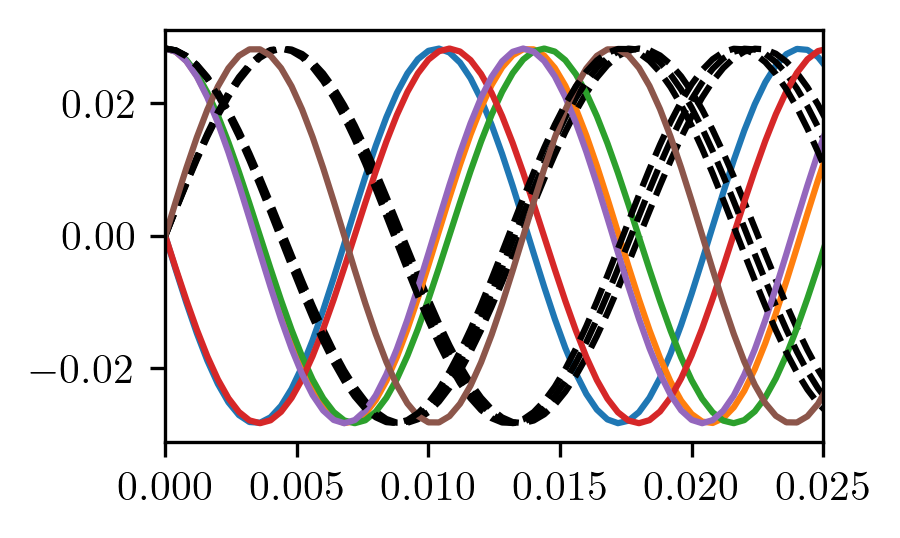

In [21]:
s = 110
for i in range(6):
    i = i+s
    plt.plot(x, svd_basis.U[:, i])
    plt.plot(x, trig_basis_odd.U[:, i], "k--")
    plt.xlim([0, 0.025])
is_flipped = np.median(svd_basis.U/trig_basis_odd.U, axis=0)<0
np.median(svd_basis.U/trig_basis_odd.U, axis=0)[s:s+2]


In [22]:
def is_sin_cos_pair(x, U):
    m, n = U.shape

    delta_x = x[1]-x[0]
    A = (2*delta_x)**.5
    e1 = np.zeros(m//2, )
    e2 = np.zeros(m//2, )
    for i in range(m//2):
        omega = (2*i+1)/2 * 2*np.pi
        s = lambda x, c: A * np.sin(omega*x + c)
        c = lambda x, c: A * np.cos(omega*x + c)
        ydata1 = U[:, 2*i]
        ydata2 = U[:, 2*i+1]
        popt1, pcov1 = curve_fit(s, x, ydata1, p0=[0.0], bounds=[-3.142, 3.142])
        popt2, pcov2 = curve_fit(c, x, ydata2, p0=[0.0], bounds=[-3.142, 3.142])
        e1[i] = ((ydata1 - s(x, popt1[0]))**2).mean()**.5
        e2[i] = ((ydata2 - c(x, popt2[0]))**2).mean()**.5
        if e1[i]>1e-10 and False:
            fig, ax = plt.subplots()
            ax.plot(x, ydata1, "b-")
            ax.plot(x, s(x, popt1[0]), "b--")
            ax.plot(x, ydata2, "r-")
            ax.plot(x, c(x, popt2[0]), "r--")
            ax.set_xlim([0, 0.025])
            aasd
        # print("{:.6f}, {:.6f}".format(popt1[0], popt1[0]), "{:.6f}, {:.6f}".format(pcov1[0][0], pcov2[0][0]))
    fig, ax1 = plt.subplots()
    ax1.plot(np.arange(1, len(e1)+1), e1, "k.", ms=1)
    ax1.set_xlabel("$i$")
    ax1.set_ylabel(r'$ || e ||_{L_2} $')
    ax1.set_yscale('log')
    ax1.set_xlim([0, len(e1)])
    ax1.set_ylim([1e-20, 100])
    ax1.grid(which="both")
    plt.tight_layout()
    plt.show()

    fig, ax1 = plt.subplots()
    ax1.plot(np.arange(1, len(e2)+1), e2, "k.", ms=1)
    ax1.set_xlabel("$i$")
    ax1.set_ylabel(r'$ || e ||_{L_2} $')
    ax1.set_yscale('log')
    ax1.set_xlim([0, len(e2)])
    ax1.set_ylim([1e-20, 100])
    ax1.grid(which="both")
    plt.tight_layout()
    plt.show()
    print(e1)
    
print(svd_basis.U.shape)
#is_sin_cos_pair(x, svd_basis.U)

(2500, 2500)


In [23]:
phase_shift_U = np.zeros(m,)
phase_shift_VT = np.zeros(m,)

#for i in range(m//2):
if False:
    a1 = trig_basis_odd.U[:, 2*i]
    a2 = trig_basis_odd.U[:, 2*i+1]
    ydata1 = svd_basis.U[:, 2*i]
    ydata2 = svd_basis.U[:, 2*i+1]
    ydata3 = svd_basis.VT[2*i, :]
    ydata4 = svd_basis.VT[2*i+1, :]
    
    omega = (2*i+1)/2 * 2*np.pi
    delta_x = x[1]-x[0]
    A = (2*delta_x)**.5
    s = lambda x, c: A * np.sin(omega*x + c)
    c = lambda x, c: A * np.cos(omega*x + c)
    popt1, pcov1 = curve_fit(s, x, ydata1, p0=[0.1], bounds=[-3.142, 3.142])
    popt2, pcov2 = curve_fit(c, x, ydata2, p0=[0.1], bounds=[-3.142, 3.142])
    popt3, pcov3 = curve_fit(c, mu, ydata3, p0=[0.1], bounds=[-3.142, 3.142])
    popt4, pcov4 = curve_fit(s, mu, ydata4, p0=[0.1], bounds=[-3.142, 3.142])
    e1 = ((ydata1 - s(x, popt1[0]))**2).sum()
    e2 = ((ydata2 - c(x, popt2[0]))**2).sum()
    e3 = ((ydata3 - c(x, popt3[0]))**2).sum()
    e4 = ((ydata4 - s(x, popt4[0]))**2).sum()
    p1, p2, p3, p4 = (popt1[0]/np.pi)%1, (popt2[0]/np.pi)%1, (popt3[0]/np.pi)%1, (popt4[0]/np.pi)%1
    print("{:.6f}, {:.6f}, {:.6f}, {:.6f}".format(p1, p2, p3, p4))
    print("{:.6f}, {:.6f}, {:.6f}, {:.6f}".format(e1, e2, e3, e4))
    print("{:.6f}, {:.6f}, {:.6f}, {:.6f}".format(pcov1[0][0], pcov2[0][0], pcov3[0][0], pcov4[0][0]))
    
    phase_shift_U[2*i] = (popt1[0]/np.pi)%1
    phase_shift_U[2*i+1] = (popt2[0]/np.pi)%1
    phase_shift_VT[2*i] = (popt3[0]/np.pi)%1
    phase_shift_VT[2*i+1] = (popt4[0]/np.pi)%1
    if False:
        fig, ax1 = plt.subplots()
        fig, ax2 = plt.subplots()
        ax1.plot(x, ydata1, 'r-')
        ax1.plot(x, ydata2, 'g-')
        ax2.plot(mu, ydata3, 'r-')
        ax2.plot(mu, ydata4, 'g-')
        ax1.plot(x, s(x, popt1[0]), 'k--', label='fit: c=%5.3f' % popt1[0])
        ax1.plot(x, c(x, popt2[0]), 'k--', label='fit: c=%5.3f' % popt2[0])
        ax2.plot(mu, s(mu, popt3[0]), 'k--', label='fit: c=%5.3f' % popt3[0])
        ax2.plot(mu, c(mu, popt4[0]), 'k--', label='fit: c=%5.3f' % popt4[0])
        plt.show()
print(phase_shift_U)
print(phase_shift_VT)

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


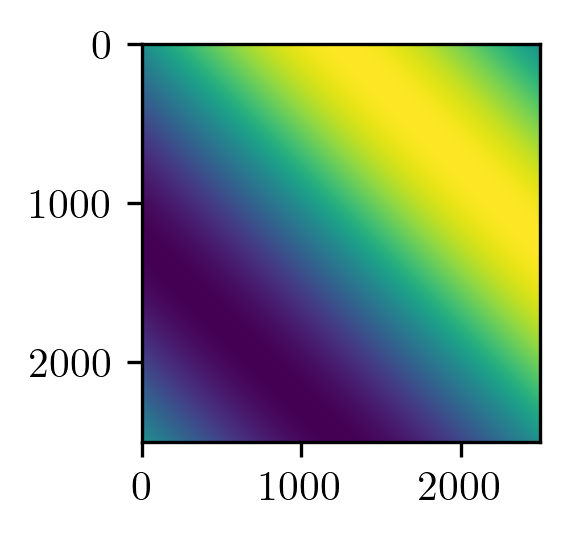

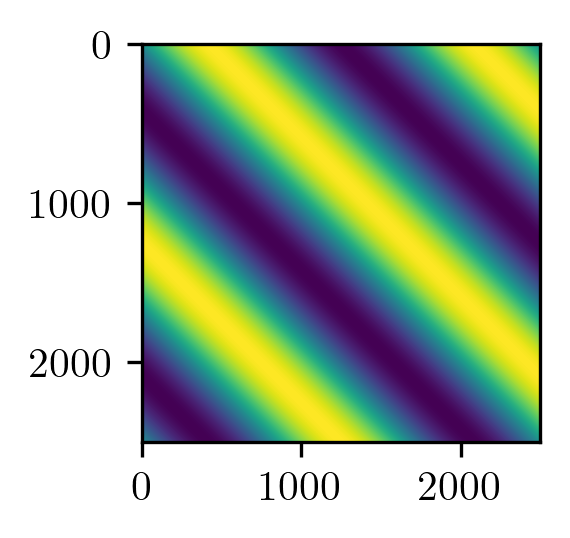

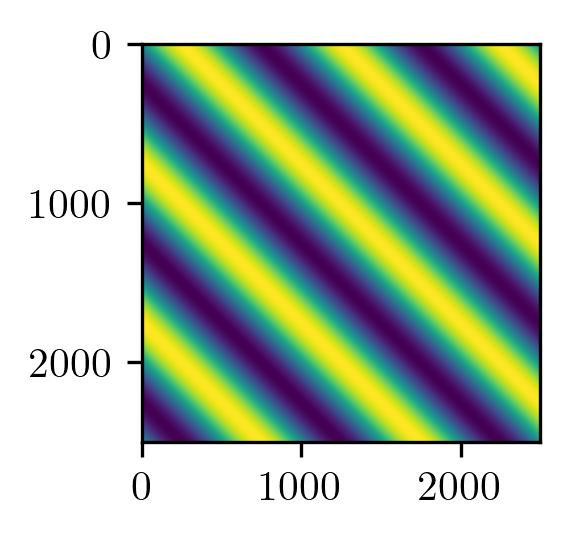

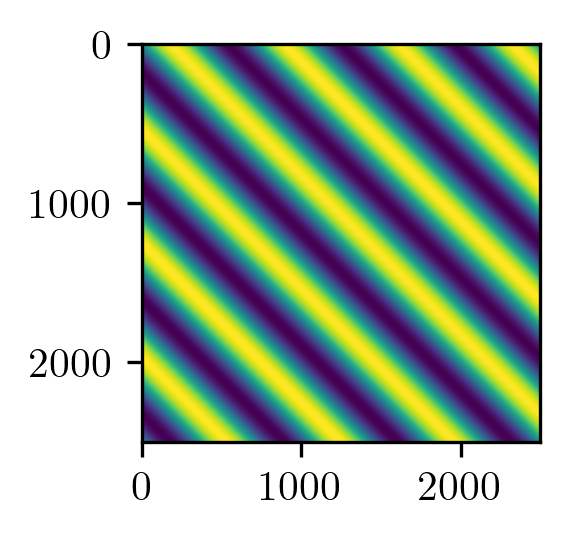

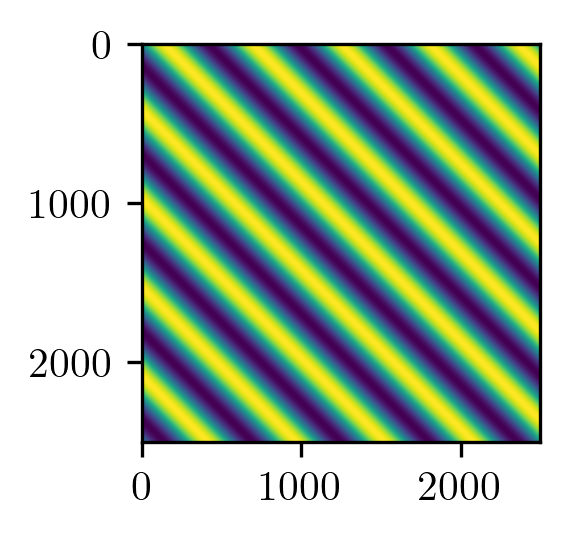

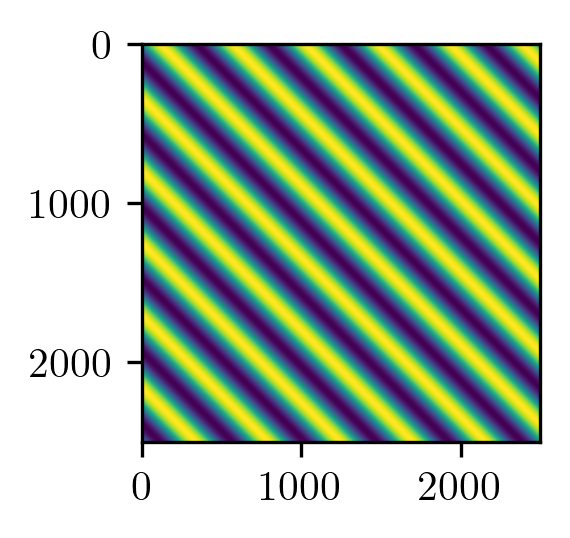

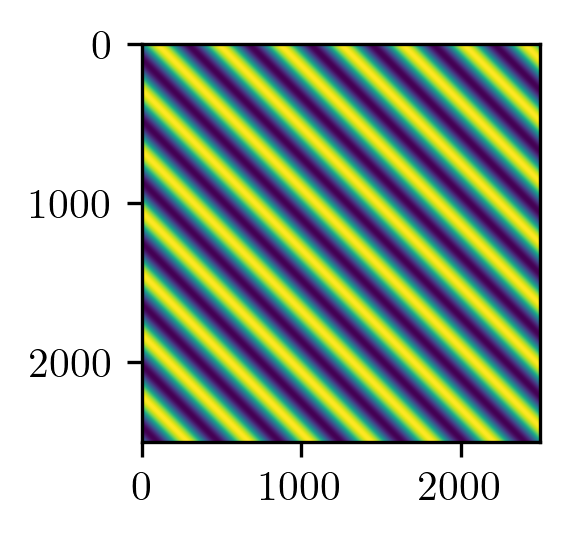

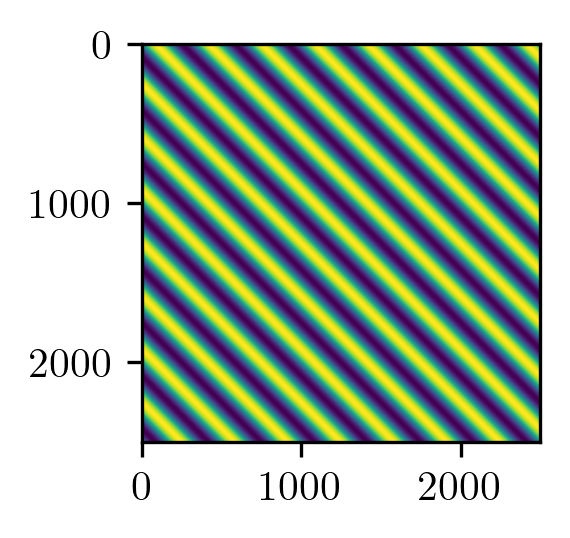

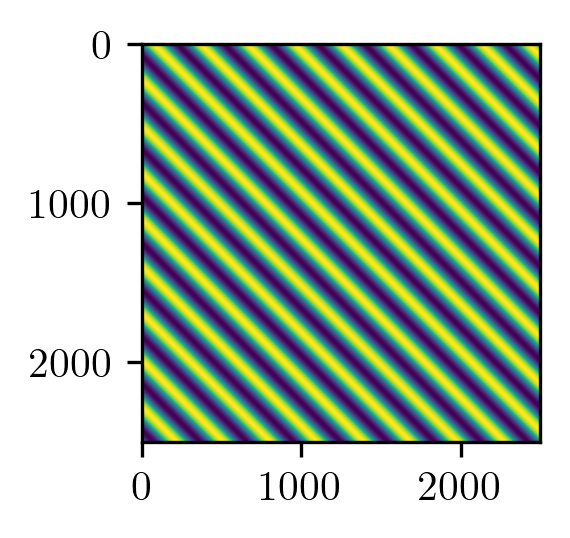

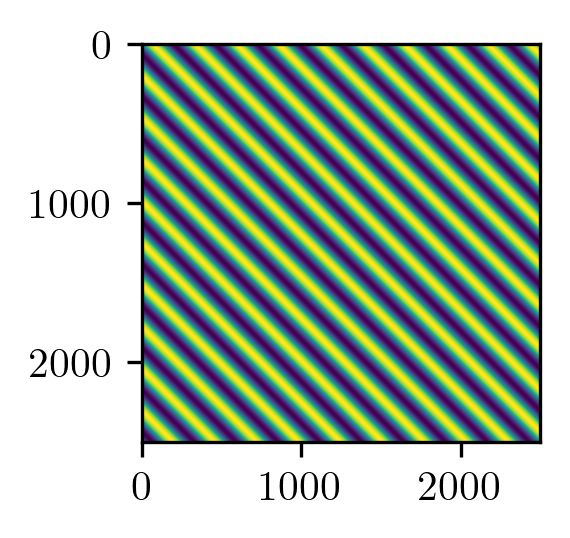

In [24]:
for i in range(m//2):
    if i < 10:
        ydata1 = svd_basis.U[:, 2*i]
        ydata2 = svd_basis.U[:, 2*i+1]
        ydata3 = svd_basis.VT[2*i, :]
        ydata4 = svd_basis.VT[2*i+1, :]
        plt.imshow((ydata1*ydata3[:, None] +  ydata2*ydata4[:, None]))
        plt.show()

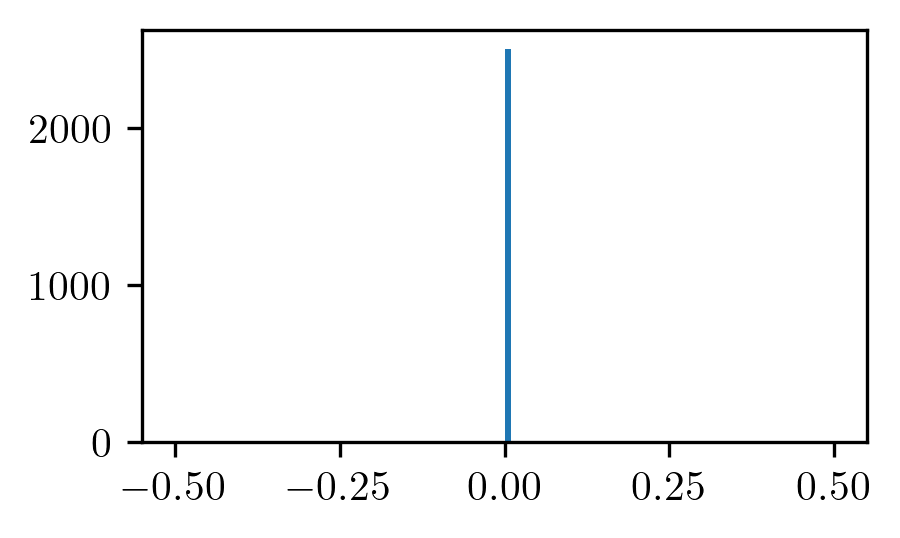

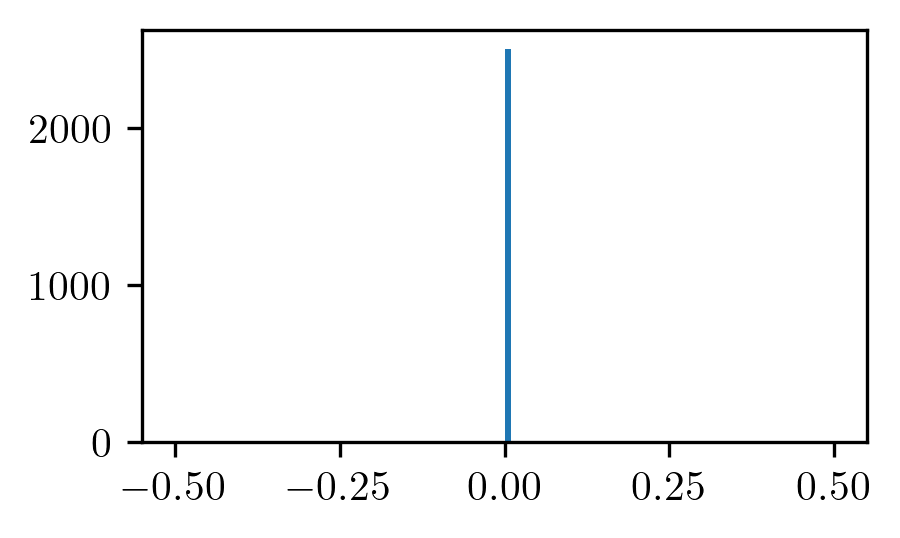

In [25]:
plt.hist(phase_shift_U, 100)
plt.show()
plt.hist(phase_shift_VT, 100)
plt.show()

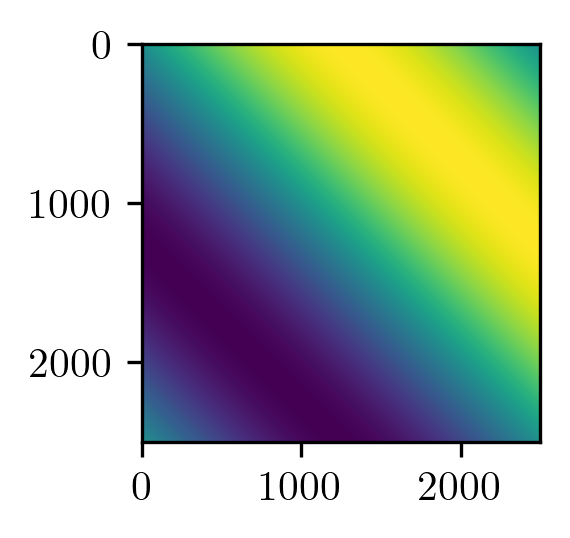

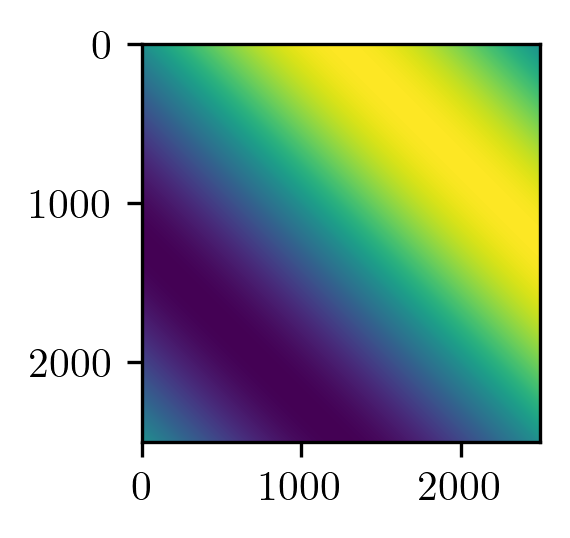

True


In [26]:
i = 0
omega = (2*i+1)/2 * 2*np.pi

rc = -np.sin(omega*(x[:, None]-mu))
plt.imshow(rc)
plt.show()

c = .1234
r1, r2 = -np.sin(omega*(x[:, None]+c)), np.cos(omega*(x[:, None]+c))
c1, c2 = np.cos(omega*(mu+c)), np.sin(omega*(mu+c))

rc2 = r1*c1+r2*c2
plt.imshow(rc2)
plt.show()

print(np.allclose(rc, rc2))


In [27]:
res = trig_basis_odd.U.T @ svd_basis.U
def save(res):
    print(res.min(), res.max())
    cs = plt.imshow(res, interpolation="nearest", origin="upper")
    plt.colorbar(cs)
    a = np.round(cmap(res/2+0.5)*256, decimals=0)
    img = np.array(a-1, dtype=np.uint8)
    from PIL import Image
    im = Image.fromarray(img)
    im.save('outfile.png')

$sin(x+c) = cos(c)sin(x) + sin(c)cos(x)$


$cos(x+c) = -sin(c)sin(x) + cos(c)cos(x)$

In [28]:
def sort_trig_basis(trig_basis_odd, X):
    V_k = trig_basis_odd.U.reshape(m, -1, 2)  # x, r, 2
    V_1 = V_k[:, :, 0].copy()  # sin
    c = V_1.T @ X  # V_1.T @ X is slow!
    c_n = (c**2).sum(axis=1)
    order = np.argsort(-c_n)
    trig_basis_odd.U = V_k[:, order, :].reshape(m, -1)
    f_s = f_s[order]
    f_c = f_c[order]
    trig_basis_odd.frequencies = np.c_[f_s[:, None], f_c[:, None]].ravel()
    return None


def SVD_vs_trig_basis(svd_basis, trig_basis_odd):
    # correlation matrix
    cm = trig_basis_odd.U.T @ svd_basis.U  # (n, m) (m, r) = n, r
    frequencies = trig_basis_odd.frequencies
    A = (2*(x[1]-x[0]))**.5
    e = np.zeros_like(frequencies)

    for i in range(m//2):  # m//2
        SVD_psi_1 = svd_basis.U[:, 2*i]
        SVD_psi_2 = svd_basis.U[:, 2*i+1]
        f1, f2 = frequencies[2*i], frequencies[2*i+1]
        # c1 and c2 are equal, unless th sign of the SVD is flipped.
        # A flipped sign looks like a phase shift by +- pi
        # we dont know when that happens, we just compute a new c 
        cos_c1 = cm[2*i, 2*i]  # n, r
        sin_c1 = -cm[2*i+1, 2*i]
        sin_c2 = cm[2*i, 2*i+1]
        cos_c2 = cm[2*i+1, 2*i+1]

        c1 = np.arctan2(sin_c1, cos_c1)
        psi_1 = A*np.sin(2*np.pi*f1*x-c1)

        c2 = np.arctan2(sin_c2, cos_c2)
        psi_2 = A*np.cos(2*np.pi*f2*x-c2)

        e[2*i] = ((SVD_psi_1-psi_1)**2).sum()**.5
        e[2*i+1] = ((SVD_psi_2-psi_2)**2).sum()**.5
    return e

In [29]:
trig_basis_odd = TrigonometricOdd(x)
m, n  = trig_basis_odd.U.shape
i = np.arange(m//2)
f_s = f_c = (2*i+1)/2






save(ccm)
print(trig_basis_odd.U[0, :100])
fig, ax = plt.subplots()
plt.plot(order, "k.")
print(f_s[:80])

NameError: name 'ccm' is not defined

In [ ]:
A = (2*(x[1]-x[0]))**.5
e = np.zeros_like(frequencies)

for i in range(m//2):  # m//2
    SVD_psi_1 = svd_basis.U[:, 2*i]
    SVD_psi_2 = svd_basis.U[:, 2*i+1]
    f1 = f_s[i]
    f2 = f_c[i]
    print(i, f1, f2)
    assert f1 == f2, "sorting went wrong."

    cos_c1 = ccm[2*i, 2*i]  # n, r
    sin_c1 = -ccm[2*i+1, 2*i]
    sin_c2 = ccm[2*i, 2*i+1]
    cos_c2 = ccm[2*i+1, 2*i+1]
    print("{:.4f} {:.4f}".format(cos_c1, sin_c2))
    print("{:.4f} {:.4f}".format(sin_c1, cos_c2))

    print("cos(c),cos(c),sin(c),-sin(c) {:.4f} {:.4f} {:.4f} {:.4f}".format(cos_c1, cos_c2, sin_c1, sin_c2))
    # because of the sorting, sin and cos might be swapped.
    # We can figure out which is first by checking the projection coefficients:
    #if (a-d)<1e-6 and (-b-c)<1e-12:
    #assert (a-d)<1e-6 and (-b-c)<1e-12
    c1 = np.arctan2(sin_c1, cos_c1)
    psi_1 = A*np.sin(2*np.pi*f1*x-c1)
    print("c={:.4f} {:.4f} {:.4f}".format(c1, np.sin(c1), np.cos(c1)))
    c2 = np.arctan2(sin_c2, cos_c2)
    psi_2 = A*np.cos(2*np.pi*f2*x-c2)
    print("c={:.4f} {:.4f} {:.4f}".format(c2, np.sin(c2), np.cos(c2)))

    fsin = lambda x, c: A * np.sin(2*np.pi*f1*x - c)

    e[2*i] = ((SVD_psi_1-psi_1)**2).sum()**.5
    e[2*i+1] = ((SVD_psi_2-psi_2)**2).sum()**.5
    if e[i]>1e-6:
        print("large error1, this should be a sine")
        print("c=", c1)
        plt.plot(x, SVD_psi_1, "g.")
        plt.plot(x, psi_1, "b.", ms=2)
        plt.plot(x, trig_basis_odd.U[:, 2*i], "r.", ms=1)
        plt.show()
    if e[i+1]>1e-6:
        print("large error2, this should be a cosine")
        print("c=", c2)
        plt.plot(x, SVD_psi_2, "g.")
        plt.plot(x, psi_2, "b.", ms=2)
        plt.plot(x, trig_basis_odd.U[:, 2*i+1], "r.", ms=1)
        plt.show()

    
    # yfit = A*a*np.sin(2*np.pi*f1*x) + A*b*np.cos(2*np.pi*f2*x)
fig, ax = plt.subplots()
ax.plot(frequencies, e, "b.", ms=1)
ax.set_yscale('log')

In [ ]:
i = np.arange(m//2)
i_sin = 2*i
i_cos = 2*i+1
f_s = f_c = (2*i+1)/2
frequencies = np.c_[f_s[:, None], f_c[:, None]].ravel()
ccm = trig_basis_odd.U.T @ svd_basis.U
U_f = np.zeros_like(frequencies)

for i in range(m):  # m//2
    flag = False
    ydata = svd_basis.U[:, i]
    l = np.abs(ccm[:, i]) > 1e-6
    ff = frequencies[l]
    if ff.size > 1:
        assert ff.size == 2
        assert ff[0] == ff[1]
        a, b = ccm[l, i]
        print(i)
        print("c=", np.arccos(a), -np.arcsin(b))
        print("c=", np.arcsin(a), np.arccos(b))
        f = ff[0]
        yfit = A*a*np.sin(2*np.pi*f*x) + A*b*np.cos(2*np.pi*f*x)
        
        if  np.abs(np.arccos(a) - -np.arcsin(b)) < 1e-6:
            c = np.arccos(a)
            yfit2 = A*np.sin(2*np.pi*f*x-c)
            print("its a sin", c)
        elif np.abs(np.arcsin(a) - np.arccos(b))<1e-6:
            c = np.arcsin(a)
            yfit2 = A*np.cos(2*np.pi*f*x-c)
            print("its a cos", c)
        else:
            print(":()")
            c = 2*np.pi-np.arccos(a)
            print(c)
            yfit2 = A*np.sin(2*np.pi*f*x-c1)
#        U[:, 2*i] = A * np.sin(omega*x)
#        U[:, 2*i+1] = A * np.cos(omega*x)
        if flag:
            plt.plot(x, ydata, "g.")
            plt.plot(x, yfit, "r.", ms=1)
            plt.plot(x, yfit2, "b.", ms=1)
            plt.show()
    else:
        assert ff.size == 1
    U_f[i] = ff[0]
fig, ax = plt.subplots()
ax.plot(frequencies, "g.", ms=1)
ax.plot(U_f, "k.", ms=1)
ax.set_xlabel("$i$")
ax.set_ylabel("$f$")
ax.set_xlim([0, m])
ax.set_ylim([0, U_f.max()])

In [ ]:
a_ = np.zeros(m,)
f_ = np.zeros(m,)
c_ = np.zeros(m,)

def func(x, a, f, c):
    print("func", a, f, c)
    return a * np.sin(2*np.pi*(f*x + c))

def myDfun(xdata, a, f, c) :
    print("myDfun", a, f, c)
    x = xdata[:, None]
    
    omega_x = 2*np.pi*(f*x+c)
    dfda = np.sin(omega_x)
    dfdf = 2*np.pi*a*x*np.cos(omega_x)
    dfdc = 2*np.pi*a * np.cos(omega_x)
    return np.hstack((dfda, dfdf, dfdc))

for i in range(500):  # m//2
    print(i)
    ydata1 = svd_basis.U[:, 2*i]
    ydata2 = svd_basis.U[:, 2*i+1]

    f = U_f[2*i]
    a = (2*(x[1]-x[0]))**.5
    c = 0.1
    sin = lambda x, a, f, c: a * np.sin(2*np.pi*(f*x + c))
    cos = lambda x, a, f, c: a * np.cos(2*np.pi*(f*x + c))
    print("{:.4f} sin(2*pi*({:.6f}+{:.6f}))".format(a,f,c))

    popt1, pcov1 = curve_fit(sin, x, ydata1, p0=[a, f, c], bounds=([a*.8, .8*f, -1.01], [1.2*a, 1.2*f, 1.01]), jac=myDfun)
    popt2, pcov2 = curve_fit(cos, x, ydata2, p0=[a, f, c], bounds=([a*.8, .8*f, -1.01], [1.2*a, 1.2*f, 1.01]), method="dogbox")
    e1 = ((ydata1 - sin(x, *popt1))**2).sum()
    e2 = ((ydata2 - cos(x, *popt2))**2).sum()
    p1, p2 = (popt1[0]/np.pi)%1, (popt2[0]/np.pi)%1
    print("{:.4f} sin(2*pi*({:.6f}+{:.6f}))".format(*popt1))
    print("{:.4f} cos(2*pi*({:.6f}+{:.6f}))".format(*popt2))
    print("{:.6f}, {:.6f}".format(e1, e2))
    print("{:.6f}, {:.6f}".format(pcov1[0][0], pcov2[0][0]))
    
    a_[2*i] = popt1[0]
    a_[2*i+1] = popt2[0]
    f_[2*i] = popt1[1]
    f_[2*i+1] = popt2[1]
    c_[2*i] = (popt1[2]/np.pi)%1
    c_[2*i+1] = (popt2[2]/np.pi)%1

    if e1>1e-6:
        fig, ax1 = plt.subplots()
        ax1.plot(x, ydata1, 'r-')
        #ax1.plot(x, ydata2, 'g-')
        ax1.plot(x, sin(x, *popt1), 'k--', label='fit: c=%5.3f' % popt1[2])
        ax1.plot(x, sin(x, a, f, c), 'g--', label='fit: c=%5.3f' % popt1[2])
        #ax1.plot(x, cos(x, *popt2), 'k--', label='fit: c=%5.3f' % popt2[2])
        ax1.set_xlim([0, 0.1])
        plt.show()
        asd
print(phase_shift_U)
print(phase_shift_VT)

In [ ]:
c = U.T @ X
c_n = (c**2).sum(axis=1)
U = trig_basis_odd.U[:, np.argsort(-c_n)]
plt.plot(c_n, "b.", ms=1)
plt.gca().set_yscale('log')